In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')


from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus
import graphviz
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.metrics import accuracy_score,f1_score,recall_score,precision_score, confusion_matrix,auc,roc_auc_score
%matplotlib inline



from scipy.cluster.hierarchy import dendrogram , linkage
from sklearn.cluster import KMeans
import numpy as np
import seaborn as sns




In [4]:
df = pd.read_csv('credits.csv')
df.head()

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,...,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,<0,6,critical/other existing credit,radio/tv,1169,no known savings,>=7,4,male single,none,...,real estate,67,none,own,2,skilled,1,yes,yes,good
1,0<=X<200,48,existing paid,radio/tv,5951,<100,1<=X<4,2,female div/dep/mar,none,...,real estate,22,none,own,1,skilled,1,none,yes,bad
2,no checking,12,critical/other existing credit,education,2096,<100,4<=X<7,2,male single,none,...,real estate,49,none,own,1,unskilled resident,2,none,yes,good
3,<0,42,existing paid,furniture/equipment,7882,<100,4<=X<7,2,male single,guarantor,...,life insurance,45,none,for free,1,skilled,2,none,yes,good
4,<0,24,delayed previously,new car,4870,<100,1<=X<4,3,male single,none,...,no known property,53,none,for free,2,skilled,2,none,yes,bad


In [5]:
df.dtypes

checking_status           object
duration                   int64
credit_history            object
purpose                   object
credit_amount              int64
savings_status            object
employment                object
installment_commitment     int64
personal_status           object
other_parties             object
residence_since            int64
property_magnitude        object
age                        int64
other_payment_plans       object
housing                   object
existing_credits           int64
job                       object
num_dependents             int64
own_telephone             object
foreign_worker            object
class                     object
dtype: object

#### EDA

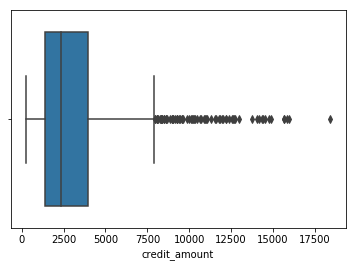

In [6]:
sns.boxplot(df['credit_amount'])

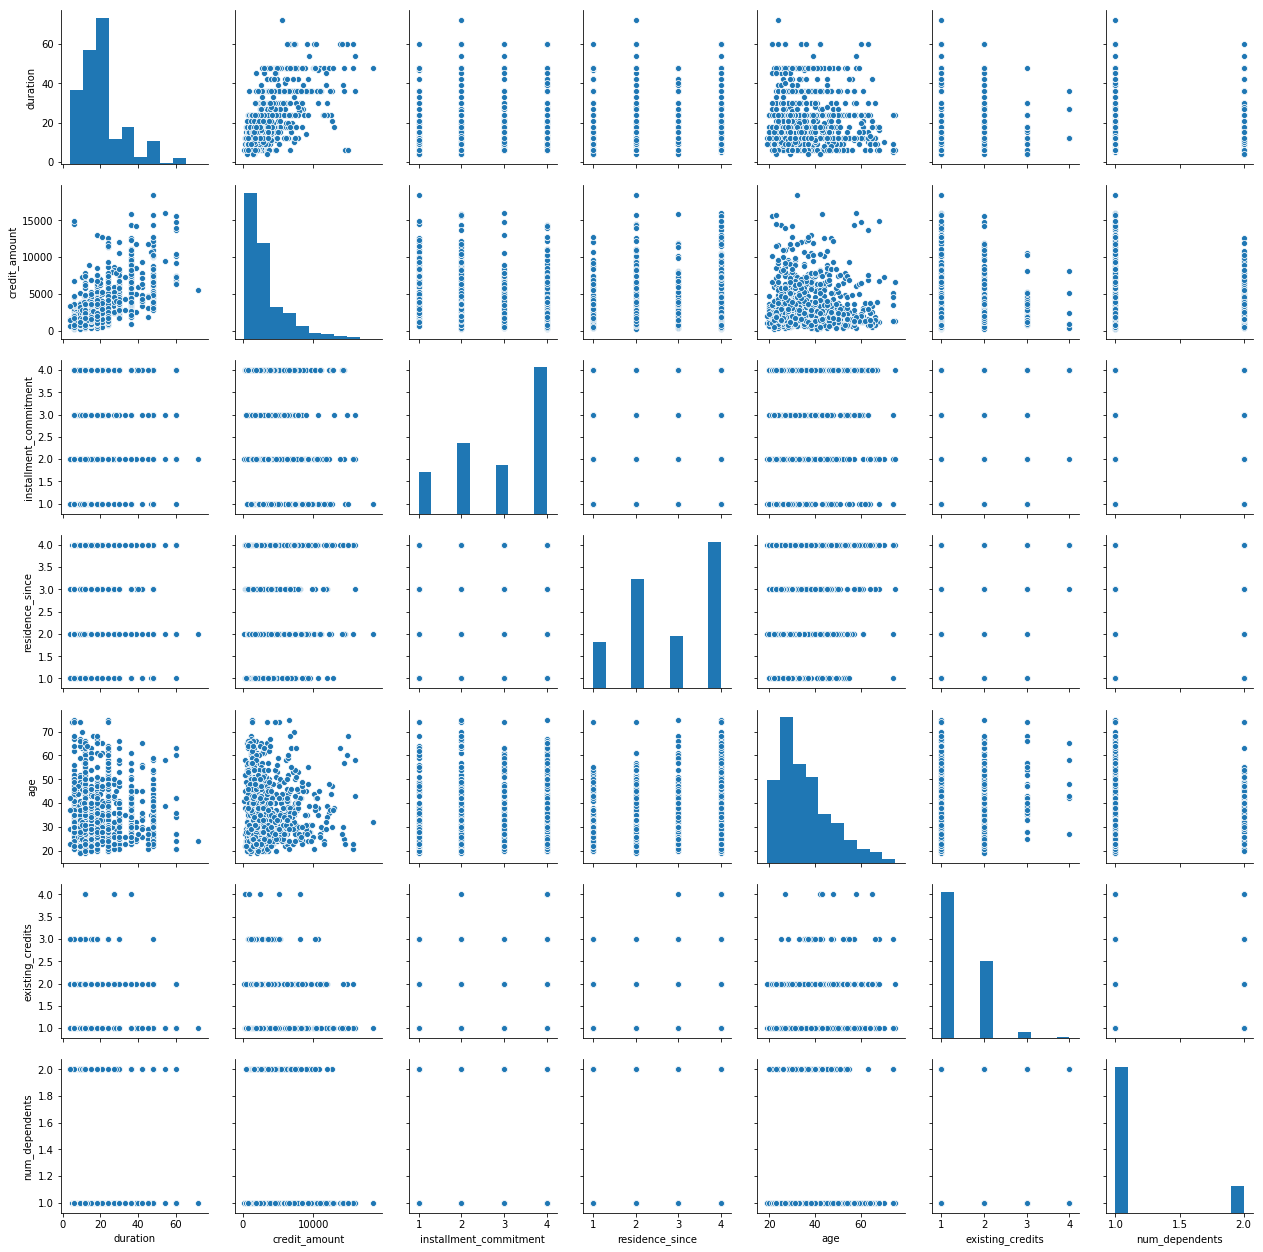

In [7]:
sns.pairplot(df)
plt.show()

In [8]:
df['class'].value_counts(normalize=True)*100

good    70.0
bad     30.0
Name: class, dtype: float64

In [9]:
df.groupby('class').count()

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,residence_since,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker
class,,,,,,,,,,,,,,,,,,,,
bad,300,300,300,300,300,300,300,300,300,300,300,300,300,300,300,300,300,300,300,300
good,700,700,700,700,700,700,700,700,700,700,700,700,700,700,700,700,700,700,700,700


In [10]:
df.groupby('class').mean()

,duration,credit_amount,installment_commitment,residence_since,age,existing_credits,num_dependents
class,,,,,,,
bad,24.860000,3938.126667,3.096667,2.850000,33.963333,1.366667,1.153333
good,19.207143,2985.457143,2.920000,2.842857,36.224286,1.424286,1.155714


In [11]:
df.shape

(1000, 21)

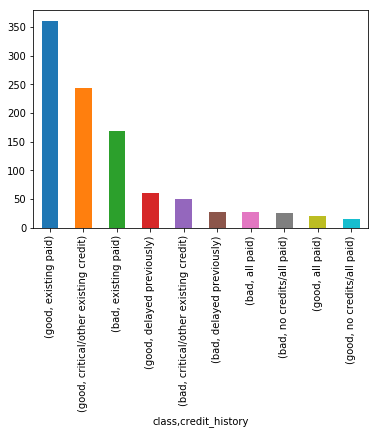

In [12]:
df.groupby(['class','credit_history']).size().sort_values(ascending=False).plot(kind='bar')

In [13]:
df = df.drop('class',axis=1)
df.head()

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,residence_since,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker
0,<0,6,critical/other existing credit,radio/tv,1169,no known savings,>=7,4,male single,none,4,real estate,67,none,own,2,skilled,1,yes,yes
1,0<=X<200,48,existing paid,radio/tv,5951,<100,1<=X<4,2,female div/dep/mar,none,2,real estate,22,none,own,1,skilled,1,none,yes
2,no checking,12,critical/other existing credit,education,2096,<100,4<=X<7,2,male single,none,3,real estate,49,none,own,1,unskilled resident,2,none,yes
3,<0,42,existing paid,furniture/equipment,7882,<100,4<=X<7,2,male single,guarantor,4,life insurance,45,none,for free,1,skilled,2,none,yes
4,<0,24,delayed previously,new car,4870,<100,1<=X<4,3,male single,none,4,no known property,53,none,for free,2,skilled,2,none,yes


In [14]:
df.isnull().sum()

checking_status           0
duration                  0
credit_history            0
purpose                   0
credit_amount             0
savings_status            0
employment                0
installment_commitment    0
personal_status           0
other_parties             0
residence_since           0
property_magnitude        0
age                       0
other_payment_plans       0
housing                   0
existing_credits          0
job                       0
num_dependents            0
own_telephone             0
foreign_worker            0
dtype: int64

In [15]:
X = pd.get_dummies(df,drop_first = True)

In [16]:
df.columns


Index(['checking_status', 'duration', 'credit_history', 'purpose',
       'credit_amount', 'savings_status', 'employment',
       'installment_commitment', 'personal_status', 'other_parties',
       'residence_since', 'property_magnitude', 'age', 'other_payment_plans',
       'housing', 'existing_credits', 'job', 'num_dependents', 'own_telephone',
       'foreign_worker'],
      dtype='object')

In [17]:
## code for scaling to z score


from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [18]:
kmeans = KMeans(n_clusters = 2).fit(X)
centroids = kmeans.cluster_centers_
print(centroids)

[[ 1.79709794e+01  2.19330593e+03  3.07496977e+00  2.83555018e+00
   3.52926239e+01  1.39540508e+00  1.15235792e+00  2.78113664e-01
   7.37605804e-02  4.00241838e-01  2.95042322e-01  7.37605804e-02
   5.51390568e-01  3.26481258e-02  1.45102781e-02  4.59492140e-02
   1.95888755e-01  2.39419589e-01  4.83675937e-03  3.09552600e-01
   2.29746070e-02  1.08827086e-02  6.77146312e-02  7.01330109e-02
   6.14268440e-01  5.19951632e-02  1.63240629e-01  1.65659008e-01
   1.81378476e-01  2.50302297e-01  5.19951632e-02  4.95767836e-02
   1.02781137e-01  5.21160822e-01  5.68319226e-02  9.05683192e-01
   2.38210399e-01  1.13663845e-01  3.22853688e-01  8.21039903e-01
   4.47400242e-02  7.38814994e-01  1.82587666e-01  6.48125756e-01
   2.29746070e-02  2.23700121e-01  3.54292624e-01  9.58887545e-01]
 [ 3.49190751e+01  8.42424277e+03  2.48554913e+00  2.89017341e+00
   3.67572254e+01  1.46242775e+00  1.16763006e+00  2.54335260e-01
   1.15606936e-02  3.64161850e-01  2.83236994e-01  1.56069364e-01
   4.2774

In [19]:
label = kmeans.labels_
label

array([0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0,

In [20]:
cluster_range = range(1,20)
cluster_errors = []

for num_clusters in cluster_range:
    clusters = KMeans(num_clusters)
    clusters.fit(X_scaled)
    cluster_errors.append(clusters.inertia_)

In [21]:
clusters_df = pd.DataFrame({"num_clusters":cluster_range, "cluster_errors": cluster_errors})
clusters_df[0:20]

,num_clusters,cluster_errors
0,1,48000.000000
1,2,45803.001566
2,3,44260.211465
3,4,42737.412549
4,5,41416.813632
5,6,40585.117998
6,7,39494.704617
7,8,38424.280674
8,9,37464.688848
9,10,36800.902664


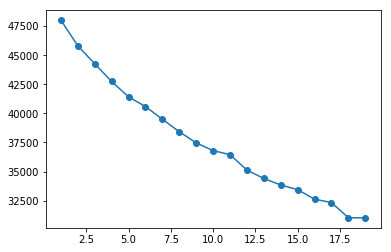

In [22]:
## ELbow Graph
plt.plot(clusters_df.num_clusters , clusters_df.cluster_errors , marker='o')
plt.show()

In [23]:
kmeans = KMeans(n_clusters = 2).fit(X)
centroids = kmeans.cluster_centers_
#print(centroids)
label = kmeans.labels_
label

array([0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0,

In [24]:
w=pd.Series(label)
df['target_credits']=w
df.head()

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,...,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,target_credits
0,<0,6,critical/other existing credit,radio/tv,1169,no known savings,>=7,4,male single,none,...,real estate,67,none,own,2,skilled,1,yes,yes,0
1,0<=X<200,48,existing paid,radio/tv,5951,<100,1<=X<4,2,female div/dep/mar,none,...,real estate,22,none,own,1,skilled,1,none,yes,1
2,no checking,12,critical/other existing credit,education,2096,<100,4<=X<7,2,male single,none,...,real estate,49,none,own,1,unskilled resident,2,none,yes,0
3,<0,42,existing paid,furniture/equipment,7882,<100,4<=X<7,2,male single,guarantor,...,life insurance,45,none,for free,1,skilled,2,none,yes,1
4,<0,24,delayed previously,new car,4870,<100,1<=X<4,3,male single,none,...,no known property,53,none,for free,2,skilled,2,none,yes,0


#### PCA

In [25]:
y = df.target_credits
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size=0.2,random_state = 100)

In [28]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [29]:
## pca
from sklearn.decomposition import PCA

# create pca instance
pca = PCA()
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [30]:
pca.explained_variance_ratio_

array([0.06886457, 0.05462472, 0.04761374, 0.04476732, 0.04056973,
       0.03995356, 0.03482542, 0.03397506, 0.03164208, 0.02976394,
       0.02850569, 0.02803133, 0.02638732, 0.02606186, 0.02461141,
       0.02423951, 0.0238171 , 0.02293565, 0.02209483, 0.02155907,
       0.02097049, 0.02074745, 0.0201376 , 0.0193499 , 0.01830578,
       0.01786198, 0.01753001, 0.0172532 , 0.0165356 , 0.01610727,
       0.01488388, 0.01449104, 0.0132195 , 0.01290696, 0.01184809,
       0.00988646, 0.00947557, 0.00894716, 0.00802744, 0.00741099,
       0.00676687, 0.00550517, 0.00505523, 0.00344583, 0.00319467,
       0.00219044, 0.00172607, 0.00137544])

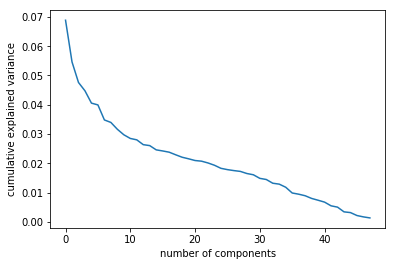

In [31]:
plt.plot(pca.explained_variance_ratio_)
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

## Random Forest 

In [32]:
x = df.drop('target_credits', axis = 1)
x=pd.get_dummies(x)
y= df.target_credits
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y , test_size=0.2,random_state = 100)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## pca
from sklearn.decomposition import PCA

# create pca instance
pca = PCA(n_components = 2)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)


# train and test model
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(max_depth  = 2, random_state = 0)
classifier.fit(X_train , y_train)

# predicting the Test set results
y_pred = classifier.predict(X_test)
from sklearn.metrics import classification_report , confusion_matrix , accuracy_score
print('confusion_mat:',confusion_matrix(y_test , y_pred))
print('accuracy:',accuracy_score(y_test , y_pred)*100)



confusion_mat: [[160   0]
 [ 34   6]]
accuracy: 83.0


## SVM

In [33]:
x = df.drop('target_credits', axis = 1)
x=pd.get_dummies(x)
y= df.target_credits
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y , test_size=0.2,random_state = 100)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## pca
from sklearn.decomposition import PCA

# create pca instance
pca = PCA(n_components = 2)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)



from sklearn.svm import SVC
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

clf = SVC(kernel='linear')
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print(accuracy_score(y_test,y_pred))

0.855


## decision tree

#### gini

In [34]:
x = df.drop('target_credits', axis = 1)
x=pd.get_dummies(x)
y= df.target_credits
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y , test_size=0.2,random_state = 100)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## pca
from sklearn.decomposition import PCA

# create pca instance
pca = PCA(n_components = 2)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)


model_gini=DecisionTreeClassifier()
model_gini.fit(X_train, y_train)
preds_gini = model_gini.predict(X_test)
model_gini_train=DecisionTreeClassifier()
model_gini_train.fit(X_train, y_train)
preds_gini_train= model_gini.predict(X_train)
#Confusion matrix
from sklearn.metrics import classification_report,confusion_matrix
mat_gini = confusion_matrix(y_test,preds_gini)
print("confusion matrix = \n",mat_gini)
#Calculate accuracy
print('test:',accuracy_score(y_test,preds_gini))
print('train:',accuracy_score(y_train,preds_gini_train))

confusion matrix = 
 [[145  15]
 [ 26  14]]
test: 0.795
train: 1.0


#### it is an underfit model

#### entropy

In [35]:
x = df.drop('target_credits', axis = 1)
x=pd.get_dummies(x)
y= df.target_credits
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y , test_size=0.2,random_state = 100)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## pca
from sklearn.decomposition import PCA

# create pca instance
pca = PCA(n_components = 2)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

model_entropy=DecisionTreeClassifier(criterion='entropy')
model_entropy.fit(X_train, y_train)
preds_entropy = model_entropy.predict(X_test)
preds_entropy_train = model_entropy.predict(X_train)
#Confusion matrix
from sklearn.metrics import classification_report,confusion_matrix
mat_gini = confusion_matrix(y_test,preds_entropy)

print("confusion matrix = \n",mat_gini)
print(accuracy_score(y_test,preds_entropy))
print(accuracy_score(y_train,preds_entropy_train))
print(metrics.classification_report(y_test,preds_entropy))

#Confusion matrix
from sklearn.metrics import classification_report,confusion_matrix
mat_entropy = confusion_matrix(y_test,preds_entropy)

print("confusion matrix = \n",mat_entropy)

confusion matrix = 
 [[142  18]
 [ 24  16]]
0.79
1.0
              precision    recall  f1-score   support

           0       0.86      0.89      0.87       160
           1       0.47      0.40      0.43        40

   micro avg       0.79      0.79      0.79       200
   macro avg       0.66      0.64      0.65       200
weighted avg       0.78      0.79      0.78       200

confusion matrix = 
 [[142  18]
 [ 24  16]]


#### Gaussian

In [36]:
x = df.drop('target_credits', axis = 1)
x=pd.get_dummies(x)
y= df.target_credits
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y , test_size=0.2,random_state = 100)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## pca
from sklearn.decomposition import PCA

# create pca instance
pca = PCA(n_components = 2)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

classifier = GaussianNB()
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
y_pred_train = classifier.predict(X_train)
y_pred_train
mat_gaus = confusion_matrix(y_test,y_pred)
print("confusion matrix = \n",mat_gaus)
#Calculate accuracy
print(accuracy_score(y_test,y_pred))
print(accuracy_score(y_train,y_pred_train))

confusion matrix = 
 [[155   5]
 [ 24  16]]
0.855
0.86875


#### bernoullis

In [37]:
x = df.drop('target_credits', axis = 1)
x=pd.get_dummies(x)
y= df.target_credits
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y , test_size=0.2,random_state = 100)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## pca
from sklearn.decomposition import PCA

# create pca instance
pca = PCA(n_components = 2)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)


optimal_alpha = 1
NB_optimal = BernoulliNB(alpha=optimal_alpha)

# fitting the model
NB_optimal.fit(X_train, y_train)
y_pred_ber = NB_optimal.predict(X_test)
y_pred_train1 = NB_optimal.predict(X_train)
y_pred_train
mat_ber = confusion_matrix(y_test,y_pred_ber)

print("confusion matrix = \n",mat_ber)
#Calculate accuracy
print(accuracy_score(y_test,y_pred_ber))
print(accuracy_score(y_train,y_pred_train1))

confusion matrix = 
 [[160   0]
 [ 40   0]]
0.8
0.83375


#### Logistic Regression

In [38]:
x = df.drop('target_credits', axis = 1)
x=pd.get_dummies(x)
y= df.target_credits
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y , test_size=0.2,random_state = 100)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## pca
from sklearn.decomposition import PCA

# create pca instance
pca = PCA(n_components = 2)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)


lm = LogisticRegression()
model = lm.fit(X,y)
predictions = lm.predict(X)
## accuracy of logistic regression
# print( lm.score(X,y))

## confusion matrix
from sklearn.metrics import confusion_matrix
conf_cancer = confusion_matrix(y, predictions)
conf_cancer

from sklearn.linear_model import LogisticRegression
model1 = LogisticRegression()
model1.fit(X_train, y_train)

y_pred = model1.predict(X_test)
y_pred1 = model1.predict(X_train)

from sklearn.metrics import accuracy_score
print('acc_test:',accuracy_score(y_test, y_pred))
print('acc_train:',accuracy_score(y_train, y_pred1))


acc_test: 0.86
acc_train: 0.87875


#### KNN 

In [42]:
x = df.drop('target_credits', axis = 1)
x=pd.get_dummies(x)
y= df.target_credits
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y , test_size=0.2,random_state = 100)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## pca
from sklearn.decomposition import PCA

# create pca instance
pca = PCA(n_components = 2)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

#Build the mdoel on the train set
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 3)
x,y = df.loc[:,df.columns != 'target_credits'], df.loc[:,'target_credits']
knn.fit(X_train,y_train)
#predict probabilities - first 10 values
knn.predict_proba(X_test)[:10]
prediction = knn.predict(X_test)
print('With KNN (K=3) accuracy is: ',knn.score(X_test,y_test)) # accuracy

With KNN (K=3) accuracy is:  0.83
